# Bode plot for inverting OPA [gain 1] and [gain 10]

In [44]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

DATADIR = "../data-source"
OUTPUTDIR = "./output"

# Gain 2

### Read DataFrames

In [45]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_errors.csv")

### Convert to arrays of uncertainties

In [46]:
index=[28,29]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [47]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log10(x), gains_arr))


### Canvas

In [48]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [49]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 1")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [50]:
#function = "1/[0]*(1-1/[0]*exp(x/[0]))"



In [51]:
R1= 987
R2= 990
R3= 9700


In [52]:
A_v2_d = 20*umath.log10(1+R2/R1)
#f_l2 = 1/np.sqrt(2)*(1+R2/R1)
print('guadagno calcolato = ',A_v2_d)
#print('freq taglio = ',f_l2)

guadagno calcolato =  6.033790332880712


In [53]:
function = "[1]*(1/sqrt(1+(x/[0])**2))"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f.SetParName(0, "f_l2")
fit_f.SetParName(1, "Gain2")
fit_f.SetParameter(0, 10**6)
fit_f.SetParameter(1, A_v2_d)

#fit_f.SetParLimits(1,A_v2_d-1,A_v2_d+1)
#fit_f.SetParLimits(0,1e+05,1e+07)

In [54]:

fit_f.SetLineColor(4)

### Draw

 FCN=1314.18 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS         500 TOTAL
                     EDM=3.86463e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  f_l2         1.64187e+10   1.41421e+00   0.00000e+00  -4.50156e-16
   2  Gain2       -1.72335e+00   8.12585e-02   8.12585e-02  -1.57758e-10


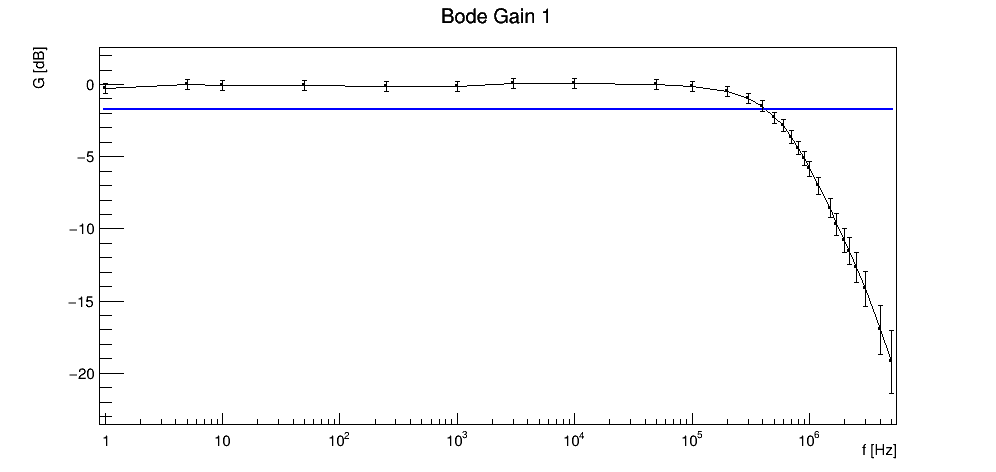

In [55]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f, "MSE")

In [56]:
###prova scipy
db_gains_arr

[-0.2924818301746463+/-0.3310148529151779,
 0.0+/-0.3412139702063196,
 -0.05928957927478011+/-0.3353970664081265,
 -0.06052909260375669+/-0.34240910453438794,
 -0.12148295424386304+/-0.343625287188438,
 -0.12148295424386304+/-0.343625287188438,
 0.060953861640106494+/-0.3448120638832389,
 0.060953861640106494+/-0.3448120638832389,
 0.0+/-0.34601980077260586,
 -0.12320617409636893+/-0.34850013510055977,
 -0.48947538766401166+/-0.3464319472043844,
 -0.9484929985627623+/-0.3589432067983344,
 -1.5001634312045329+/-0.3721757916949141,
 -2.3026966622851104+/-0.3909731170399691,
 -2.863271134289981+/-0.4075762466812107,
 -3.641632454897374+/-0.4331395453383549,
 -4.39740367268537+/-0.4609847677914652,
 -5.117356738115747+/-0.4905230739352366,
 -5.821989883130677+/-0.5189604100568161,
 -7.008269907450318+/-0.579971440983809,
 -8.566452753315168+/-0.6717657095304399,
 -9.69532892819127+/-0.7491705585010793,
 -10.79902956310887+/-0.8528286035937923,
 -11.539512967490001+/-0.9168773586516136,
 -1

In [57]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log10(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors = [0.3310148529151779,
 0.3412139702063196,
 0.3353970664081265,
 0.34240910453438794,
 0.343625287188438,
 0.343625287188438,
 0.3448120638832389,
 0.3448120638832389,
 0.34601980077260586,
 0.34850013510055977,
 0.3464319472043844,
 0.3589432067983344,
 0.3721757916949141,
 0.3909731170399691,
 0.4075762466812107,
 0.4331395453383549,
 0.4609847677914652,
 0.4905230739352366,
 0.5189604100568161,
 0.579971440983809,
 0.6717657095304399,
 0.7491705585010793,
 0.8528286035937923,
 0.9168773586516136,
 1.036910513183667,
 1.2293082769857626,
 1.687001936182873,
 2.184472921754653]



H(s) = TransferFunctionContinuous(
array([601823.70820669]),
array([1.e+00, 6.e+05]),
dt: None
)


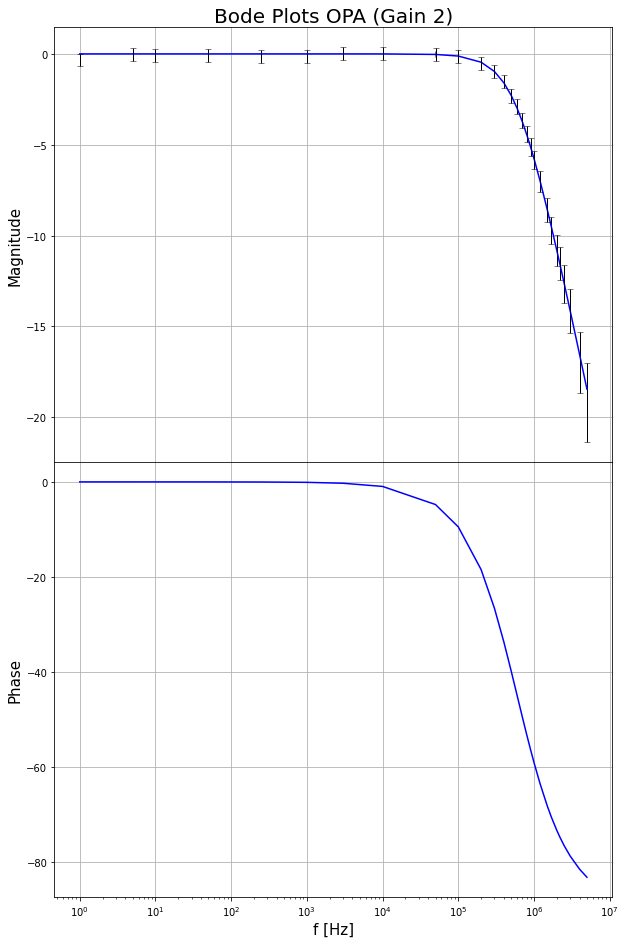

In [58]:

G2=(1+R2/R1)-1
fH2=6*10**5
a=1/fH2
b=0
c=0


num = np.array([G2]) #zeros(increase 20 db)
den = np.array([a,1]) #poles (decreases 20 db) [1,a+b+c,ab+ca+cb,abc]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f, mag, phase = H.bode(df_data_n['f']) #df_data_n['f'] 

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag,color = "blue") # Magnitude Plot
plt.title('Bode Plots OPA (Gain 2)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 3)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, phase,color = "blue")
plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain2(mag+phase).pdf")
plt.show()


In [16]:
mag-db_gain_Arr

array([ 0.31884267,  0.02636084,  0.08565042,  0.0868899 ,  0.14784304,
        0.14783173, -0.0347016 , -0.03579923, -0.00369426,  0.03057478,
        0.05826132,  0.00575371, -0.07048416,  0.03878416, -0.12066798,
       -0.06317096, -0.01321048,  0.02488397,  0.07598665,  0.0449307 ,
       -0.01056647,  0.16588116, -0.00644948, -0.03113462,  0.06143671,
        0.0351243 ,  0.43663285,  0.75255082])

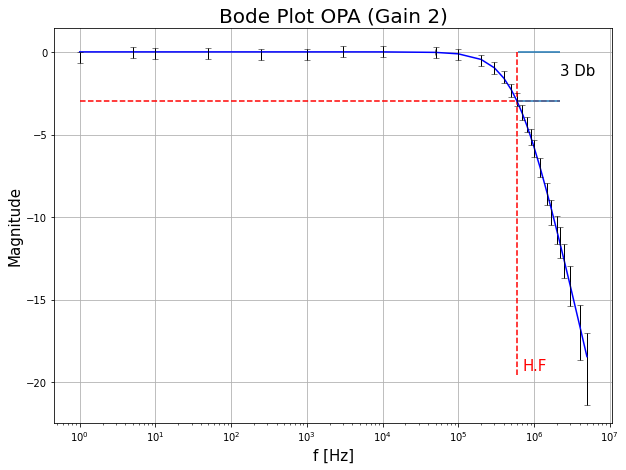

In [59]:
plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag,color = "blue") # Magnitude Plot
plt.title('Bode Plot OPA (Gain 2)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 3)
plt.vlines(fH2, mag[26]-3,  mag[0], linestyles="--", color = "red")
plt.hlines(mag[0]-3,f[0],f[23], linestyles="--", color = "red")
plt.text(fH2+100000, mag[26]-2, 'H.F', verticalalignment='top', horizontalalignment='left', color='red', fontsize=15)

max_in = mag[0]
max_rt=mag[0]-3
plt.hlines(max_in, fH2+10000, f[23])
plt.hlines(max_rt, fH2+10000, f[23])

plt.text(f[23], max_rt + abs(max_rt - max_in) - 0.7, '3 Db',verticalalignment='top', horizontalalignment='left', color='black', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain2(mag).pdf")






In [18]:
###Calcolo band width
mag_BW = mag - mag[27]
mag
#f[18]
#print(np.where(mag_BW>(mag_BW[0]/umath.sqrt(2)-0.5) and mag_BW>(mag_BW[0]/umath.sqrt(2)+0.5) ))
#print(np.where(mag_BW==45.60653209996797))
#f[np.where(mag_BW==45.60653209996797)]

array([ 2.63608385e-02,  2.63608383e-02,  2.63608374e-02,  2.63608084e-02,
        2.63600846e-02,  2.63487748e-02,  2.62522663e-02,  2.51546325e-02,
       -3.69426284e-03, -9.26313944e-02, -4.31214067e-01, -9.42739292e-01,
       -1.57064759e+00, -2.26391250e+00, -2.98393912e+00, -3.70480341e+00,
       -4.41061415e+00, -5.09247277e+00, -5.74600324e+00, -6.96333920e+00,
       -8.57701923e+00, -9.52944776e+00, -1.08054790e+01, -1.15706476e+01,
       -1.26126287e+01, -1.41233726e+01, -1.65484471e+01, -1.84521066e+01])

In [19]:
-0.15804521-3
#(f[51]+f[52])/2

-3.15804521

In [20]:
###how to get bode plot

#num = np.array([1]) #zeros(increase 20 db)
#den = np.array([1/10**6,1]) #poles (decreases 20 db)
#H = signal.TransferFunction(num, den)
#print ('H(s) =', H)
#f, mag, phase = signal.bode(H)
#plt.figure()
#plt.semilogx(f, mag) # Magnitude Plot
#plt.grid()
#plt.figure()
#plt.semilogx(f, phase) # Phase plot
#plt.show()
#len(f)

# Gain 10

In [60]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_errors.csv")
len(df_data)

29

### Convert to arrays of uncertainties

In [61]:
index=[27,28]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [62]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log10(x), gains_arr))


### Canvas

In [63]:
canvas = ROOT.TCanvas("c2", "bode gain 10", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [64]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 10")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit

In [65]:
A_v11_d = 20*umath.log10(1+R3/R1)
f_l11 = 1/np.sqrt(2)*(1+R3/R1)
print('guadagno calcolato = ',A_v11_d)
print('freq taglio = ',f_l11)

guadagno calcolato =  20.690773134416144
freq taglio =  7.656383151510266


In [66]:
function = "[1]*(1/sqrt(1+(x/[0])**2))"
fit_f11 = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f11.SetParName(0, "f_l")
fit_f11.SetParName(1, "Gain")
fit_f.SetParameter(0, 10**5)
fit_f.SetParameter(1, A_v11_d)

fit_f.SetParLimits(1,A_v11_d-2,A_v11_d+2)
fit_f.SetParLimits(1,1,10**3)

### Draw Graph

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=166.559 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         380 TOTAL
                     EDM=1.44406e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  f_l          1.33020e+05   5.91666e+03   2.27613e+01  -6.75316e-10
   2  Gain         1.98283e+01   1.49841e-01   1.49841e-01  -4.99078e-05


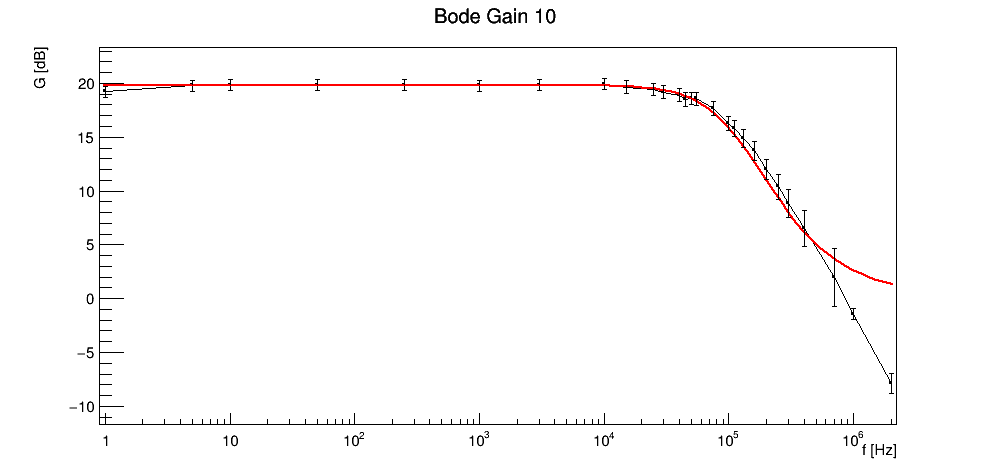

In [67]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f11, "MSE")


In [68]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log10(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors =[0.49476812680433546,
 0.5140839532243918,
 0.5161766453566071,
 0.5161766453566071,
 0.5161766453566071,
 0.5140839532243918,
 0.5161766453566071,
 0.5183135430618956,
 0.5902223277479106,
 0.5722443540890254,
 0.6254940844308975,
 0.6034386533470738,
 0.6305511142668727,
 0.5537228015136225,
 0.6054252390733152,
 0.6505261427316407,
 0.6565350182110768,
 0.7298167274022264,
 0.8141018776433374,
 0.8943701715235557,
 0.9354989439512417,
 1.2036580608023484,
 1.2876413768877326,
 1.644168540308734,
 2.73562945708666,
 0.5320467589458894,
 0.9184136827732226]


# 6.714495099740892,
# 33.34952100333063

H(s) = TransferFunctionContinuous(
array([815901.51245748]),
array([1.00000000e+00, 8.30200817e+04]),
dt: None
)


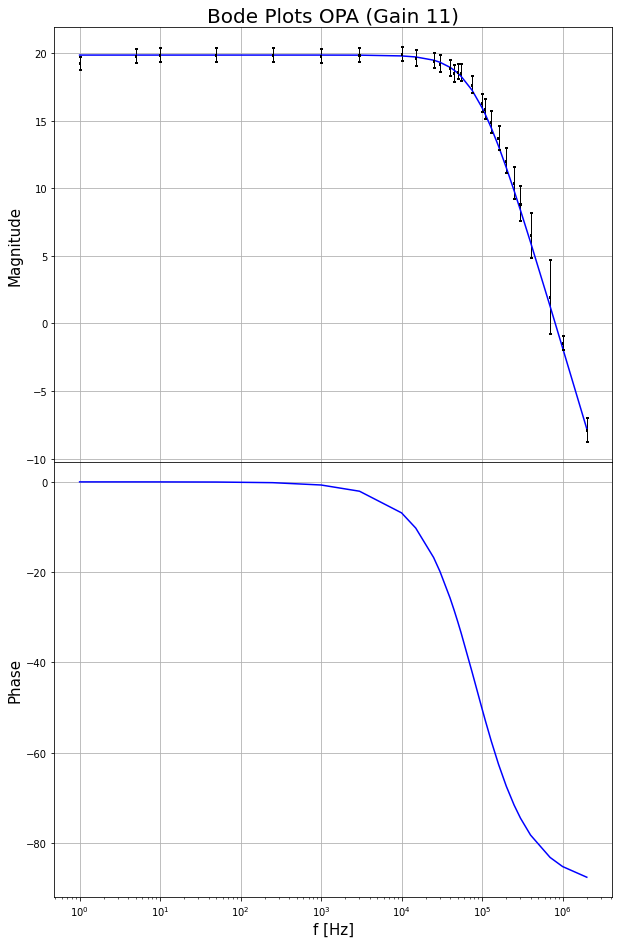

83020.08173149842

In [69]:
#k=9.8**18
#a=0.4*10**5
#b=1.2*10**5
#c=3.5*10**5

G11=1+R3/R1
fH11=fit_f11.GetParameter(0)-5*10**4
a=1/fH11
b=1
c=0

num = np.array([G11-b]) #zeros(increase 20 db)
den = np.array([a,1]) #poles (decreases 20 db) [1,a+b+c,a*b+c*a+c*b,a*b*c]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f_11, mag_11, phase_11 = H.bode(df_data_n['f']) #

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11,color = "blue") # Magnitude Plot
plt.title('Bode Plots OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f_11, phase_11,color = "blue")
plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag+phase).pdf")

plt.show()


fH11

In [70]:
mag_11-db_gain_Arr

array([ 0.61701945,  0.06715888, -0.00492366, -0.00492517, -0.00496298,
        0.06652883, -0.01059091, -0.14016779,  0.06415665,  0.0379091 ,
        0.11026661,  0.02564477,  0.23322981, -0.09601759, -0.28729212,
       -0.40009565, -0.34097625, -0.39342055, -0.41035871, -0.62646994,
       -0.51946356, -0.56207531, -0.48687256, -0.50868071, -0.70206416,
       -0.3601234 ,  0.07790225])

In [32]:
mag_11-db_gain_Arr

array([ 0.61701945,  0.06715888, -0.00492366, -0.00492517, -0.00496298,
        0.06652883, -0.01059091, -0.14016779,  0.06415665,  0.0379091 ,
        0.11026661,  0.02564477,  0.23322981, -0.09601759, -0.28729212,
       -0.40009565, -0.34097625, -0.39342055, -0.41035871, -0.62646994,
       -0.51946356, -0.56207531, -0.48687256, -0.50868071, -0.70206416,
       -0.3601234 ,  0.07790225])

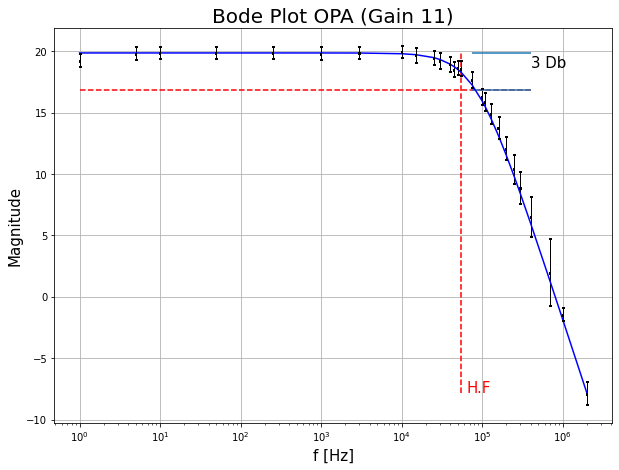

In [71]:
plt.figure(figsize=((10,16)))

fH_11 = 54622.77217684337

ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11,color = "blue") # Magnitude Plot
plt.title('Bode Plot OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar(df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors , fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.vlines(fH_11, mag_11[len(mag_11)-1],  mag_11[0], linestyles="--", color = "red")
plt.hlines(mag_11[0]-3,f_11[0],f_11[23], linestyles="--", color = "red")

plt.text(fH_11+10000, mag_11[len(mag_11)-1]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)

max_in = mag_11[0]
max_rt=mag_11[0]-3
plt.hlines(max_in, fH_11+20000, f_11[23])
plt.hlines(max_rt, fH_11+20000, f_11[23])

plt.text(f_11[23], max_rt + abs(max_rt - max_in) - 0.2, '3 Db',verticalalignment='top', horizontalalignment='left', color='black', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag).pdf")

plt.show()



In [34]:

#f, mag, phase = H.bode() 
mag_BW = mag_11 - mag_11[26]
mag_11

array([19.84909163, 19.84909162, 19.84909157, 19.84909006, 19.84905225,
       19.84846157, 19.84342432, 19.78653313, 19.70958131, 19.47211631,
       19.31607919, 18.94248411, 18.73040444, 18.5050195 , 18.26880538,
       17.25763637, 15.95585817, 15.44697138, 14.46838429, 13.11494568,
       11.52173627,  9.81963981,  8.36986059,  6.00839088,  1.2701318 ,
       -1.79707558, -7.79532197])

In [35]:
45.74330349-3
#mag_11[43]
#f_11[43]

42.74330349

In [36]:
mag_BW[24]
print(np.where(mag_BW==84.75575792647965))
f[np.where(mag_BW==84.75575792647965)]
f_11[19]

(array([], dtype=int64),)


160000

In [37]:
700000
(f[24]+f[25])/2

2750000.0

In [38]:
###Control BW*Gain
fH2*2

1200000

In [39]:
fH11*11

913220.8990464825

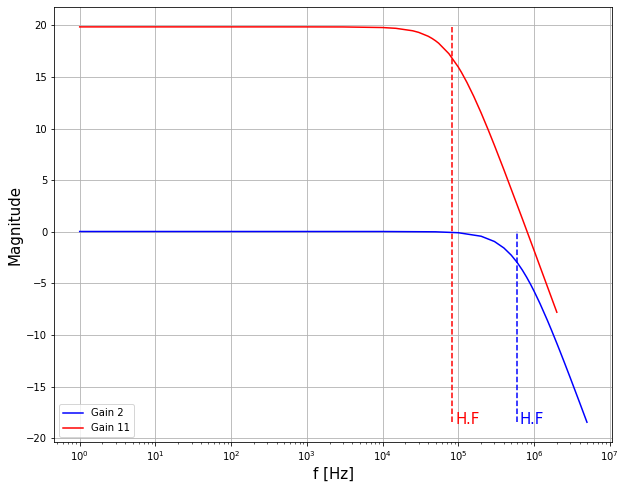

In [42]:
###plot gain 1 + gain 11
plt.figure(figsize=((10,8)))
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, mag, label='Gain 2',color = "blue")
plt.semilogx(f_11, mag_11,label='Gain 11',color = "red")
plt.vlines(fH2, mag[27],  mag[0], linestyles="--", color = "blue")
plt.text(fH2+50000, mag[27]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='blue', fontsize=15)
plt.vlines(fH11, mag[27],  mag_11[0], linestyles="--", color = "red")
plt.text(fH11+10000, mag[27]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)
plt.grid()
plt.legend(loc = "lower left")
plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain_comparison(mag).pdf")
plt.show()
